<a href="https://colab.research.google.com/github/yazfir/Projects2021/blob/master/Probabilidad/EstimarDistribucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import normal
from scipy.stats import norm

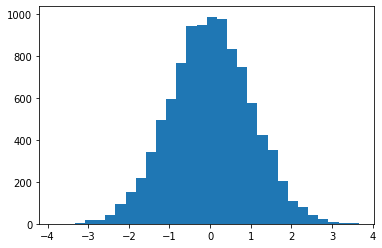

In [3]:
sample = normal(size=10000) # generador
plt.hist(sample, bins=30) # 30 intervalos para las barras del histograma
plt.show()


# Estimación Paramétrica

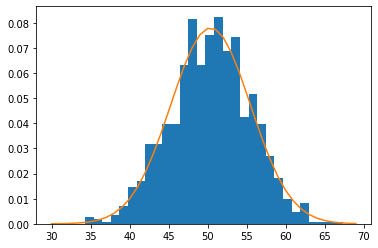

In [7]:
sample = normal(loc = 50, scale=5, size=1000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu,sigma)
values = [value for value in range(30,70)]
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values,probabilidades)
plt.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

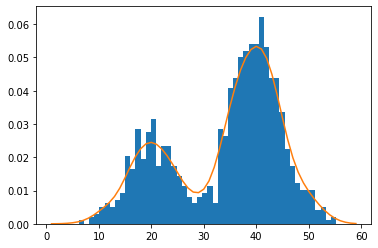

In [8]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()